### Apriori Algorithm in R Programming
The application of Market Basket Analysis (MBA) in R can use the apriori algorithm - which is one of the most popular algorithms in the machine learning area - in package arules. Arules itself stands for association rules - machine learning category. To run this algorithm, two data are needed, namely product data and transaction data.

In [3]:
#The example
library(arules)
trans <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt",format="single",sep="\t",cols=c(1,2),skip=1)
inspect(trans)
mba <- apriori(trans,parameter=list(support=0.1,confidence=0.5))
inspect(subset(mba,lift>1))

     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10          
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting an

In [6]:
#Showing the combination of 'small' transaction 
trans <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt",format="single",sep="\t",cols=c(1,2),skip=1)
inspect(apriori(trans,parameter=list(support=.1,minlen=2,target="frequent itemset")))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [9 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items                      support count
[1] {Gula,Pet Food}            0.1     1    
[2] {Gula,Sirup}               0.2     2    
[3] {Gula,Teh Celup}           0.3     3    
[4] {Pet Food,Sirup}           0.4     4    
[5] {Pet Food,Teh Celup}       0.3     3    
[6]

In [7]:
#Showing the combination of 'big' transaction 
trans <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi2.txt",format="single",sep="\t",cols=c(1,2),skip=1)
inspect(apriori(trans,parameter=list(support=.03,minlen=2,target="frequent itemset")))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [56 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [1248 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
       items                              support count
[1]    {Shampo Biasa,                                  
        Tas Makeup}                         0.031    31
[2]    {Tank Top,                                      
        Tas Tangan}                

# STEP BY STEP

In [9]:
#Read the transaction as csv
trans <- read.csv("https://academy.dqlab.id/dataset/data_transaksi.txt",sep="\t")
head(trans)

Kode.Transaksi,Item
#01,Teh Celup
#01,Sirup
#01,Pet Food
#02,Teh Celup
#02,Gula
#03,Sirup


In [11]:
#Read the transaction as transaction
read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt",format="single",sep="\t",cols=c(1,2),skip=1)

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

In [12]:
#Displaying item transaction list
trans <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt",format="single",sep="\t",cols=c(1,2),skip=1)
trans@itemInfo

labels
Gula
Pet Food
Sirup
Teh Celup


In [17]:
#Displaying transaction code list
trans@itemsetInfo

transactionID
#01
#02
#03
#04
#05
#06
#07
#08
#09
#10


In [18]:
#Displaying the transaction as matrix
trans@data

4 x 10 sparse Matrix of class "ngCMatrix"
                        
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .

In [20]:
#Displaying item frequency of the transaction
itemFrequency(trans,type="absolut")

Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8

In [21]:
#Displaying the top 3
item_data <- itemFrequency(trans,type="absolut")
item_data <- sort(item_data,decreasing=TRUE)
item_data <- item_data[1:3]
item_data <- data.frame(Item=names(item_data),Value=item_data,row.names=NULL)
item_data

Item,Value
Teh Celup,8
Sirup,6
Pet Food,5


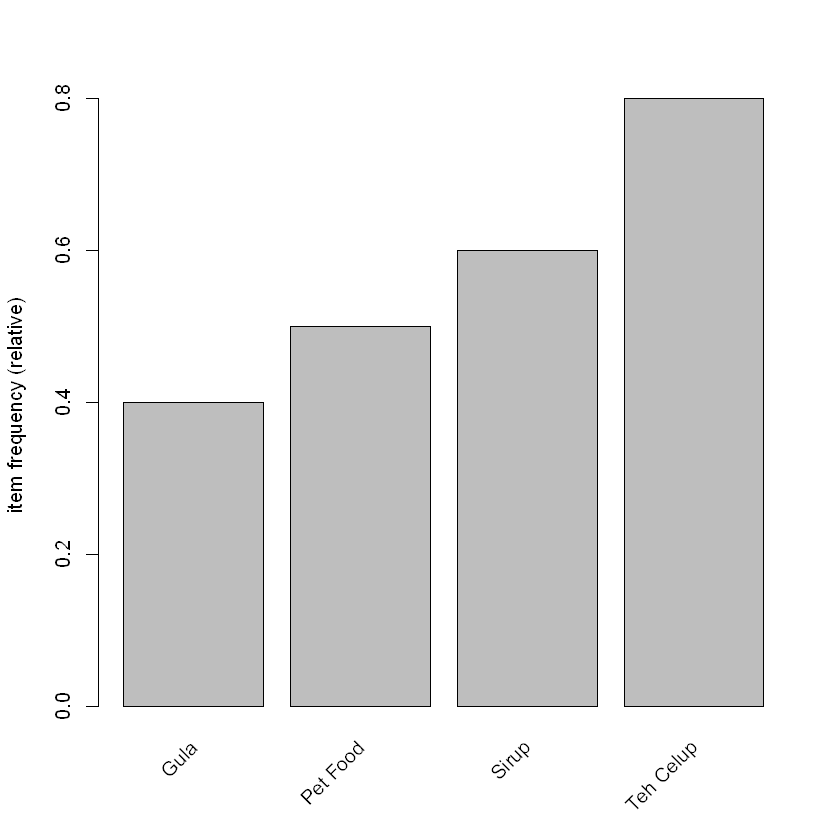

In [22]:
#Plotting the item frequency
itemFrequencyPlot(trans)

In [23]:
#Displaying itemsets 
inspect(trans)

     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10          


In [24]:
#Creating association rules
mba <- apriori(trans)
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs         support confidence lift     count
[1] {}              => {Teh Celup} 0.8     0.8        1.000000 8    
[2] {Pet Food}      => {Sirup}     0.4     0.8        1.333333 4    
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        1.666667 1    


In [26]:
#RHS Filter
inspect(subset(mba,rhs %in% "Sirup"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


In [27]:
#LHS Filter
inspect(subset(mba,lhs %in% "Pet Food"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


In [28]:
#LHS and RHS Filter
inspect(subset(mba,lhs %in% "Pet Food" & rhs %in% "Sirup"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


In [29]:
#Creating association rule with parameter
trans <- read.transactions(file="https://academy.dqlab.id/dataset/data_transaksi.txt",format="single",sep="\t",cols=c(1,2),skip=1)
mba <- apriori(trans,parameter=list(support=0.1,confidence=0.5))
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs         support confidence lift      count
[1]  {}                   => {Pet Food}  0.5     0.5000000  1.0000000 5    
[2]  {}                   => {Sirup}     0.6     0.6000000  1.0000000 6    
[3]  {}                   => {Teh Celup} 0.8     0.8000000  1.000

In [31]:
#LHS & RHS filter (2)
inspect(subset(mba,lhs %in% "Sirup" & rhs %in% "Pet Food"))

    lhs                  rhs        support confidence lift     count
[1] {Sirup}           => {Pet Food} 0.4     0.6666667  1.333333 4    
[2] {Gula,Sirup}      => {Pet Food} 0.1     0.5000000  1.000000 1    
[3] {Sirup,Teh Celup} => {Pet Food} 0.2     0.5000000  1.000000 2    


In [32]:
#Lift filter
inspect(subset(mba,(lhs %in% "Sirup" & rhs %in% "Pet Food") & lift>1.1))

    lhs        rhs        support confidence lift     count
[1] {Sirup} => {Pet Food} 0.4     0.6666667  1.333333 4    


In [34]:
#Filtering use "%ain%"
inspect(subset(mba,(lhs %ain% c("Pet Food","Gula")) & lift>1.1))

    lhs                rhs     support confidence lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667 1    


### Learning Source : www.dqlab.id